In [1]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner
from copy import deepcopy

from scipy.stats import dirichlet

In [3]:
flow_filename = '/data/wiay/2297403c/amaze_model_select/AMAZE_model_selection/rns/Flows_110324_continous/output.hdf5'
#de_filename = '/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/KDEs_280224_strictregularosation/output.hdf5'
flow_file = h5py.File(flow_filename, 'r')#
#kde_file = h5py.File(kde_filename, 'r')

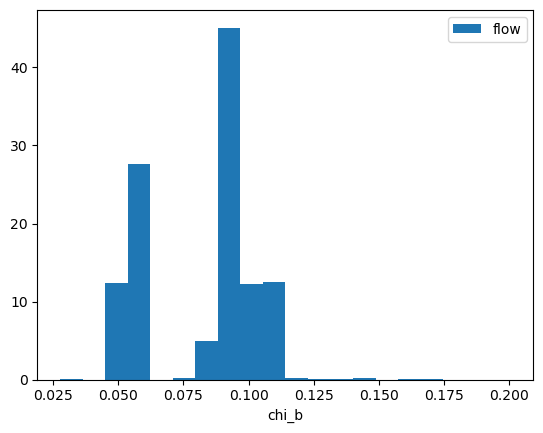

In [10]:
#relative samples in each chi_b
chi_b_samps = list(flow_file['model_selection']['samples']['block0_values'][:,0])

plt.hist(chi_b_samps, density=True, label='flow', bins=20)
plt.xlabel('chi_b')
plt.legend()
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/chib_flow_KDEcomp.pdf')

In [11]:
np.mean(chi_b_samps)

0.08129692233793412

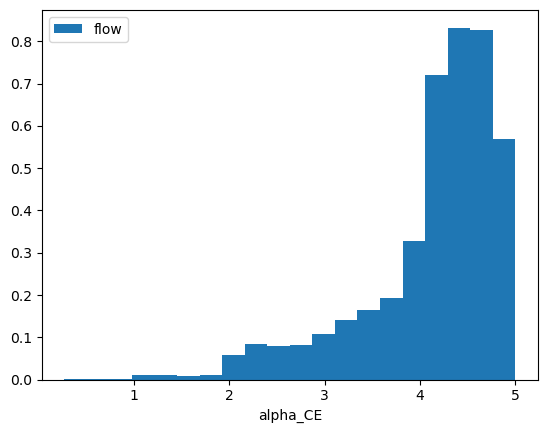

In [13]:
#relative samples in each alpha
alpha_samps = list(flow_file['model_selection']['samples']['block0_values'][:,1])

plt.hist(alpha_samps, density=True, label='flow', bins=20)
plt.xlabel('alpha_CE')
plt.legend()
#plt.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/alpha_flow_KDEcomp.pdf')

In [14]:
np.mean(alpha_samps)

4.127561549898164

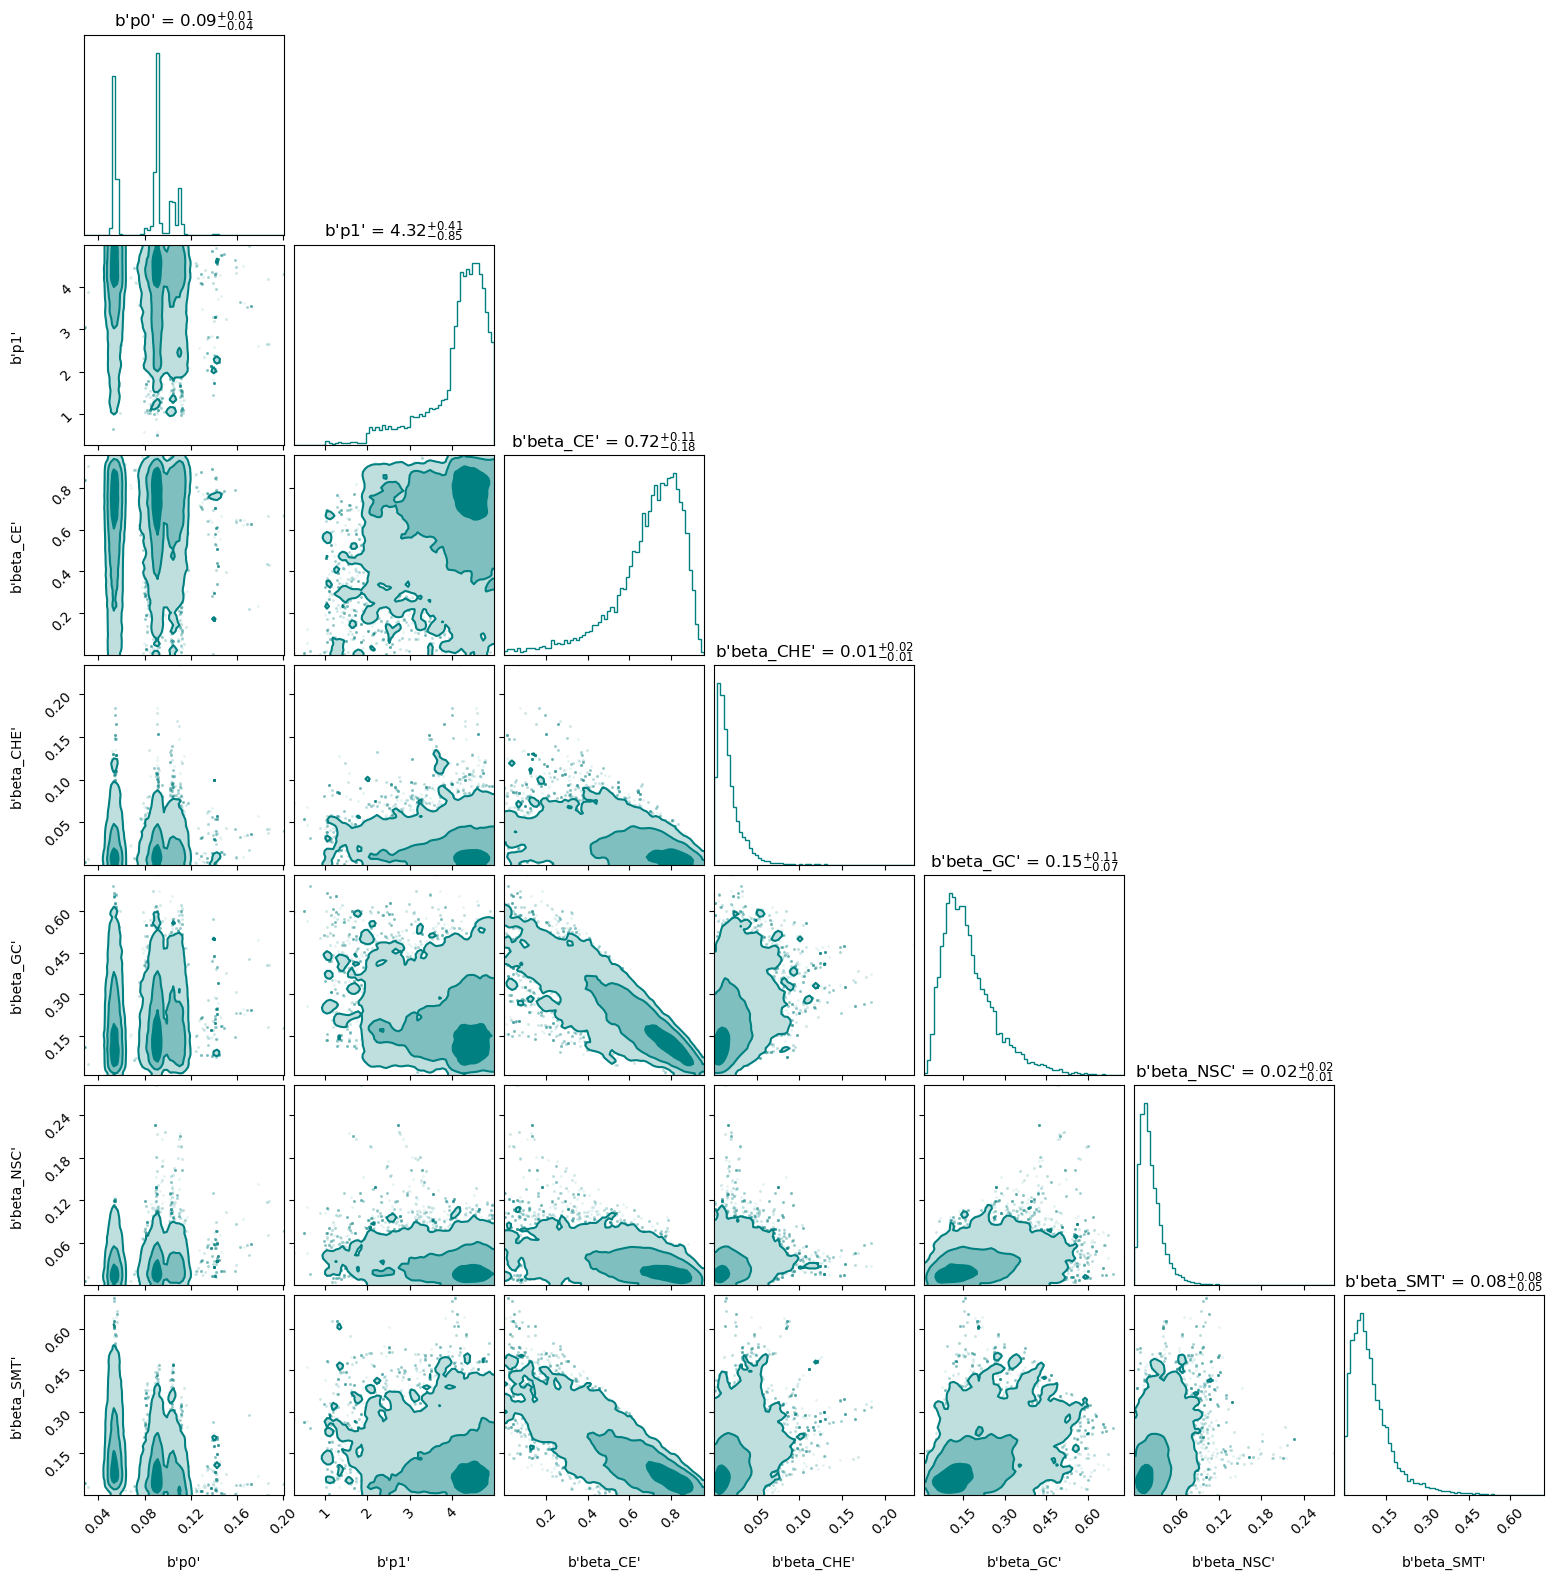

In [16]:
#corner plots of betas
branching_fracs = np.array(flow_file['model_selection']['samples']['block0_values'])

corner_kwargs = dict(
    bins=64,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
    #range = [(0.,.5),(0.,5.),(0.,.99),(0.,.99),(0.,.99),(0.,.99),(0.,.99)]
)

corner_kwargs_kde = dict(
    bins=64,
    smooth=0.9,
    color="purple",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=list(flow_file['model_selection']['samples']['block0_items']),
)

#kwargs = deepcopy(corner_kwargs)
fig_data = corner.corner(branching_fracs, **corner_kwargs)
#fig_data = corner.corner(dirichlet.pdf(np.ones(5)*0.2, np.ones(5)), fig=fig_data, **corner_kwargs_kde)
#fig_data.savefig('/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/Flows_140224_regularisation/plots/BFs_flow_KDEcomp.pdf')